In [3]:
import matplotlib.pyplot as plt
import numpy as np
import soundfile
from IPython.display import Audio

In [4]:
# CONVERTSECSAMPLES
# This script provides two examples for converting a time delay in units of
# seconds to samples and milliseconds to samples.
#
# See also CONVERTTEMPOSAMPLES

# Example 1 - Seconds to samples
Fs = 48000 # arbitrary sampling rate
timeSec = 1.5 # arbitrary time in units of seconds

# Convert to units of samples
timeSamples = np.fix(timeSec * Fs) # round to nearest integer sample

# Example 2 - Milliseconds to samples
timeMS = 330 # arbitrary time in units of milliseconds

# Convert to units of seconds
timeSec = timeMS/1000
# Convert to units of samples
timeSamples = np.fix(timeSec * Fs) # round to nearest integer samples

In [5]:
# CONVERTTEMPOSAMPLES
# This script provides an example for calculating a delay time in units of
# samples that will be synchronized with the tempo of a song in units of
# beats per minutes (BPM).
#
# Assume a (4/4) time signature where BEAT = QUARTER NOTE
#
# See also CONVERTSECSAMPLES

Fs = 48000

beatsPerMin = 90
beatsPerSec = beatsPerMin/60
secPerBeat = 1/beatsPerSec

noteDiv = 1
timeSec = noteDiv * secPerBeat
timeSamples = np.fix(timeSec * Fs)

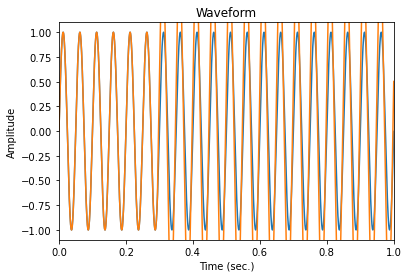

In [6]:
# ECHOSYNC
# This script demonstrates one example to create a feedforward,
# tempo-synchronized echo effect.
#
# See also CONVERTTEMPOSAMPLES

# Import our audio file
[x, Fs] = soundfile.read('sw20.wav')
Ts = 1/Fs

# Known tempo of recording
beatsPerMin = 102 # units of beats/minute

# Calculate beats fore second
beatsPerSec = beatsPerMin / 60 # 1 minute/60 seconds

# Calculate # of seconds per beat
secPerBeat = 1/beatsPerSec

# Note division
# 4 = whole, 2 = half, 1 = quarter, 0.5 = 8th, 0.25 = 16th
noteDiv = 0.5
# Calculate delay time in seconds
timeSec = noteDiv * secPerBeat

# Convert to units of samples
d = int(np.fix(timeSec * Fs)) # round to nearest integer sample

b = 0.75 # amplitude of delay branch

# Total number of samples
N = len(x)
y = np.zeros([N, 1])

# Index each element of our signal to create the output
for n in range(N):
    # When the sample number is less than the time delay
    # Avoid indexing a negative number
    if n < d + 1:
        # output = input
        y[n] = x[n]

    # Now add in the delayed signal
    else:
        # output = input + delayed version of input
        # reduce relative amplitude of delay to 3/4
        echo = n - d
        y[n] = x[n] + b * x[echo]

t = np.arange(0, N) * Ts

plt.plot(t, x, t, y)
plt.axis([0, 1, -1.1, 1.1])
plt.xlabel('Time (sec.)')
plt.ylabel('Amplitude')
plt.title('Waveform')
plt.show()

Audio(y, rate=Fs)

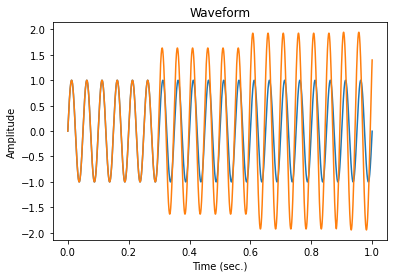

In [7]:
# ECHOFEEDBACK
# This script demonstrates one example to create a feedback, tempo-synchronized
# echo effect.
#
# See also ECHOSYNC

# Import audio file
[x, Fs] = soundfile.read('sw20.wav')
Ts = 1/Fs

# Known tempo of recording
beatsPerMin = 102 # units of beats per minute

# Calculate beats per second
beatsPerSec = beatsPerMin / 60 # 1 minute / 60 seconds

# Calculate # of seconds per beat
secPerBeat = 1/beatsPerSec

# Note division
# 4 = whole, 2 = half, 1 = quarter, 0.5 = 8th, 0.25 = 16th
noteDiv = 0.5
timeSec = noteDiv * secPerBeat

# Convert to units of samples
d = int(np.fix(timeSec * Fs)) # round to nearest integer sample

a = -0.75 # amplitude of delay branch

# Index each element of our signal to create the output
N = len(x)
y = np.zeros([N, 1])

for n in range(N):
    # When the sample number is less than the time delay
    # Avoid indexing negative sample number
    if n < d + 1:
        # output = input
        y[n] = x[n]

    # Now add in the delayed signal
    else:
        # output = input + delayed version of output
        # reduce relative amplitude of delay to 3/4
        y[n] = x[n] + (-a) * y[n-d]

t = np.arange(0, N) * Ts

plt.plot(t, x, t, y)
plt.xlabel('Time (sec.)')
plt.ylabel('Amplitude')
plt.title('Waveform')
plt.show()

Audio(y, rate=Fs)

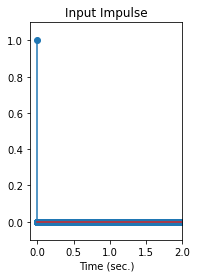

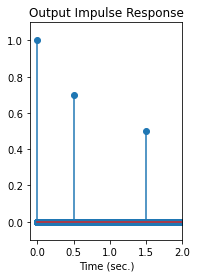

In [8]:
# IMPFIR
# This script demonstrates one example to measure the impulse response of an
# FIR system.
#
# See also IMPIIR

Fs = 48000
N = Fs * 2
# Synthesize the impulse signal
imp = np.zeros([N,1])
imp[1] = 1 # Change the first sample = 1

d1 = int(0.5 * Fs) # 1/2 second delay
b1 = 0.7 # Gain of first delay line

d2 = int(1.5 * Fs) # 3/2 second delay
b2 = 0.5 # Gain of second delay line

# Zero-pad the beginning of the signal for indexing based on the maximum
# delay time
pad = np.zeros([d2, 1])
impPad = np.concatenate((pad, imp))

out = np.zeros([N, 1])

# Index each element of our signal to create the output
for n in range(N):
    index = n + d2
    out[n] = impPad[index] + b1 * impPad[index - d1] + b2 * impPad[index - d2]

t = np.arange(0, N) / Fs
plt.subplot(1,2,1)
plt.stem(t, imp) # Plot the impulse response
plt.axis([-0.1, 2, -0.1, 1.1])
plt.xlabel('Time (sec.)')
plt.title('Input Impulse')
plt.show()

plt.subplot(1,2,2)
plt.stem(t, out) # Plot the impulse response
plt.axis([-0.1, 2, -0.1, 1.1])
plt.xlabel('Time (sec.)')
plt.title('Output Impulse Response')
plt.show()

soundfile.write('impResp.wav', out, Fs)

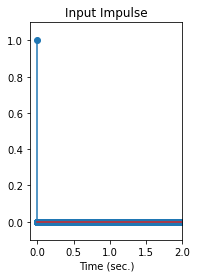

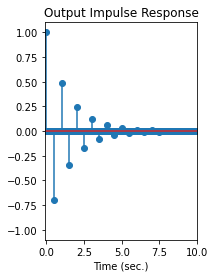

In [9]:
# IMPIIR
# This script demonstrates one example to approximate the impulse response
# of an IIR system.
#
# See also IMPFIR

Fs = 48000
Ts = 1/Fs
N = Fs * 2 # Number of samples
# Synthesize impulse signal
imp = np.zeros([N, 1])
imp[1] = 1 # Change the first sample = 1

out = np.zeros([N * 5, 1])

d1 = int(0.5 * Fs) # 1/2 second delay
a1 = -0.7 # Gain of feedback delay line

# Index each element of our signal to create the output
for n in range(d1):
    out[n] = imp[n] # Initially there is no delay

for n in np.arange(d1+1, Fs*2): # Then there is signal + delay
    out[n] = imp[n] + a1 * out[n - d1]

for n in np.arange(Fs*2+1, Fs*10): # Finally, there is only delay
    out[n] = a1 * out[n - d1] # After input finished


t = np.arange(0, N) / Fs
plt.subplot(1,2,1)
plt.stem(t, imp) # Plot the impulse response
plt.axis([-0.1, 2, -0.1, 1.1])
plt.xlabel('Time (sec.)')
plt.title('Input Impulse')
plt.show()

t = np.arange(0, Fs * 10) * Ts
plt.subplot(1,2,2)
plt.stem(t, out) # Plot the impulse response
plt.axis([-0.1, 10, -1.1, 1.1])
plt.xlabel('Time (sec.)')
plt.title('Output Impulse Response')
plt.show()

# soundfile.write('impResp.wav', imp, Fs)

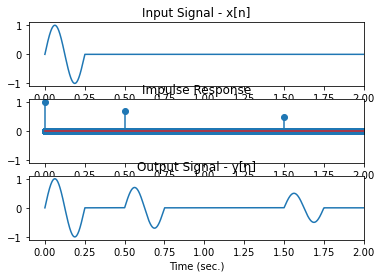

In [10]:
# CONVOLUTIONEXAMPLE
# This script demonstrates the numpy convolution function - y = np.convolve(x, h)
# The example demonstrated is with a single cycle of a sine wave. When the sine
# wave is convolved with the impulse response for an echo effect, the output
# signal has delayed copies of the sine wave at different amplitudes at
# different times.
#
# See also CONV

# Import previously saved IR
[h, Fs] = soundfile.read('impResp.wav')
N = len(h)

# Synthesize input signal
f = 4
t = np.arange(0, N*0.125)/Fs
sinWave = np.sin(2 * np.pi * f * t)
pad = np.zeros([int(N*0.875)])
x = np.concatenate((sinWave, pad))

# Perform convolution
y = np.convolve(x, h)

# Plot signals
xAxis = np.arange(0, N)/Fs
plt.subplot(3,1,1)
plt.plot(xAxis, x)
plt.axis([-0.1, 2, -1.1, 1.1])
plt.xlabel('Time (sec.)')
plt.title('Input Signal - x[n]')

plt.subplot(3,1,2)
plt.stem(xAxis, h)
plt.axis([-0.1, 2, -1.1, 1.1])
plt.xlabel('Time (sec.)')
plt.title('Impulse Response')

plt.subplot(3,1,3)
plt.plot(xAxis, y[0:Fs*2])
plt.axis([-0.1, 2, -1.1, 1.1])
plt.xlabel('Time (sec.)')
plt.title('Output Signal - y[n]')

plt.show()

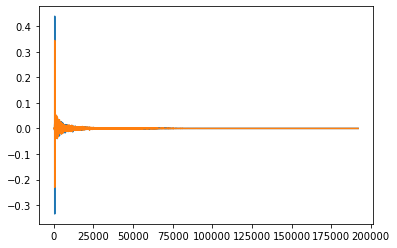

In [14]:
# REVERBCONV
# This script demonstrates the process to create a stereo convolution reverb
# by using a two-channel impulse response. This impulse response is based
# on a measurement of a recording studio in Nashville, TN.

# Import sound file and IR measurement
[x, Fs] = soundfile.read('AcGtr.wav') # Mono signal
[h,_] = soundfile.read('reverbIR.wav') # Stereo IR

# Visualize one channel of the impulse resonse
plt.plot(h[:,0])
plt.plot(h[:,1])
plt.show()

# Perform convolution
yLeft = np.convolve(x, h[:,0])
yRight = np.convolve(x, h[:,1])

y = [yLeft, yRight]

Audio(y, rate=Fs)
